##Pandas and HDF5
<img src='images/pandas.png' width=400>
This notebook illustrates the interface between Python and the high performance HDF5 format.  We utilize Pandas, a newish player on the scientific computing block.

###Pandas
Pandas is a library designed for working with structured tabular and time series data.  The library was born from the quantitative finance domain where performance and scalability are paramount.  This open source package has seen huge adoption in a short period of time.

###HDF5
The hierarchal data format (HDF) is a widely adopted high performance format for storing large structured datasets.  Pyhton offers an easy to use interface to HDF via two libraries, PyTables and Pyhdf5.  We will uses Pandas (which wraps PyTables) to extract a control network and perform some basic queries and visualizations.

<img src='images/hdf5_structure.jpg' width=800>
Image from: http://neondataskills.org/HDF5/About/



In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Open a hdf5 datastore and get the group 'free'
#The read is a little slow becuase I turned compression to almost maximum
full_df = pd.read_hdf('data/elysium_subset.h5', 'free')

###Aside
Try the following and tab complete after the `read_` to see the range of different read options support by Pandas.

In [3]:
pd.read_ #tab complete me, executing me throws the below error.

AttributeError: 'module' object has no attribute 'read_'

###Back at it

In [3]:
print "This dataframe contains {} observations".format(len(full_df))

This dataframe contains 131750 observations


In [4]:
#The dataframe supports indexing and nice rendering in an iPython notebook.
full_df[:20]

,adjustedx,adjustedy,adjustedz,aprioriline,aprioriradius_pointfile,aprioriradius_pointsource,apriorisample,apriorisurface_pointfile,apriorisurface_pointsource,apriorix,...,longitudeconstrained,measuretype,pointid,pointtype,radiusconstrained,referenceindex,sample,sampleresidual,samplesigma,serialnumber
5775,-3118086.537076,920515.979936,966585.340564,161.508401,,2,211.079666,,2,-3118066.287391,...,False,3,I00918005RDR_UL_ELYS,2,False,1,210.426071,0.009146,0,Odyssey/THEMIS_IR/701913081.076
5778,-3125852.112505,895305.583517,964619.272003,1872.349327,,2,156.864726,,2,-3125839.549098,...,False,3,I00918005RDR_UR_ELYS,2,False,1,156.168687,-0.001247,0,Odyssey/THEMIS_IR/704309997.179
5779,-3125852.112505,895305.583517,964619.272003,590.951870,,2,235.693635,,2,-3125839.549098,...,False,0,I00918005RDR_UR_ELYS,2,False,1,227.000000,0.063229,0,Odyssey/THEMIS_IR/706884749.230
5780,-3125852.112505,895305.583517,964619.272003,1178.464788,,2,38.229159,,2,-3125839.549098,...,False,3,I00918005RDR_UR_ELYS,2,False,1,38.112094,-0.161699,0,Odyssey/THEMIS_IR/815549151.076
5783,-3222938.375262,1024194.388394,269116.977155,1058.322482,,2,146.201646,,2,-3222954.095198,...,False,3,I00918005RDR_LR_ELYS,2,False,1,146.415650,0.127680,0,Odyssey/THEMIS_IR/795929995.000
5784,-3222938.375262,1024194.388394,269116.977155,2158.490442,,2,280.941659,,2,-3222954.095198,...,False,0,I00918005RDR_LR_ELYS,2,False,1,273.000000,-0.331064,0,Odyssey/THEMIS_IR/798149405.230
5785,-3222938.375262,1024194.388394,269116.977155,306.727959,,2,246.532617,,2,-3222954.095198,...,False,3,I00918005RDR_LR_ELYS,2,False,1,246.017995,0.153245,0,Odyssey/THEMIS_IR/809068871.051
5786,-3188681.231031,975471.256933,621764.816846,3581.369777,,2,173.459222,,2,-3188674.123895,...,False,3,I00918005RDR_CTR_ELYS,2,False,1,173.949289,0.009212,0,Odyssey/THEMIS_IR/699338330.000
5787,-3188681.231031,975471.256933,621764.816846,5448.625557,,2,26.508156,,2,-3188674.123895,...,False,0,I00918005RDR_CTR_ELYS,2,False,1,40.000000,0.021558,0,Odyssey/THEMIS_IR/704309997.179
5788,-3188681.231031,975471.256933,621764.816846,4149.877124,,2,113.311714,,2,-3188674.123895,...,False,3,I00918005RDR_CTR_ELYS,2,False,1,113.400349,-0.052367,0,Odyssey/THEMIS_IR/706884749.230


The above example shows that the total set of 33 columns is being truncated to try and fit into the browser windows.  Let's see a listing of the columns.

In [5]:
full_df.columns

Index([u'adjustedx', u'adjustedy', u'adjustedz', u'aprioriline',
       u'aprioriradius_pointfile', u'aprioriradius_pointsource',
       u'apriorisample', u'apriorisurface_pointfile',
       u'apriorisurface_pointsource', u'apriorix', u'aprioriy', u'aprioriz',
       u'choosername', u'datetime', u'diameter', u'editlock', u'goodnessoffit',
       u'ignore', u'jigsawrejected', u'latitudeconstrained', u'line',
       u'lineresidual', u'linesigma', u'longitudeconstrained', u'measuretype',
       u'pointid', u'pointtype', u'radiusconstrained', u'referenceindex',
       u'sample', u'sampleresidual', u'samplesigma', u'serialnumber'],
      dtype='object')

Now we can subset the dataframe to get just the interesting stuff.

In [6]:
df = full_df[['pointid', 'apriorix', 'aprioriy', 'aprioriz', 'adjustedx', 'adjustedy', 'adjustedz', 'lineresidual','sampleresidual', 'serialnumber']]

In [7]:
df[:10]

,pointid,apriorix,aprioriy,aprioriz,adjustedx,adjustedy,adjustedz,lineresidual,sampleresidual,serialnumber
5775,I00918005RDR_UL_ELYS,-3118066.287391,920493.049676,966672.446394,-3118086.537076,920515.979936,966585.340564,0.233269,0.009146,Odyssey/THEMIS_IR/701913081.076
5778,I00918005RDR_UR_ELYS,-3125839.549098,895282.379047,964681.477899,-3125852.112505,895305.583517,964619.272003,-0.080494,-0.001247,Odyssey/THEMIS_IR/704309997.179
5779,I00918005RDR_UR_ELYS,-3125839.549098,895282.379047,964681.477899,-3125852.112505,895305.583517,964619.272003,0.132819,0.063229,Odyssey/THEMIS_IR/706884749.230
5780,I00918005RDR_UR_ELYS,-3125839.549098,895282.379047,964681.477899,-3125852.112505,895305.583517,964619.272003,-0.313219,-0.161699,Odyssey/THEMIS_IR/815549151.076
5783,I00918005RDR_LR_ELYS,-3222954.095198,1024079.074252,269368.747690,-3222938.375262,1024194.388394,269116.977155,0.088028,0.127680,Odyssey/THEMIS_IR/795929995.000
5784,I00918005RDR_LR_ELYS,-3222954.095198,1024079.074252,269368.747690,-3222938.375262,1024194.388394,269116.977155,-0.318364,-0.331064,Odyssey/THEMIS_IR/798149405.230
5785,I00918005RDR_LR_ELYS,-3222954.095198,1024079.074252,269368.747690,-3222938.375262,1024194.388394,269116.977155,0.271360,0.153245,Odyssey/THEMIS_IR/809068871.051
5786,I00918005RDR_CTR_ELYS,-3188674.123895,975424.136377,621875.188225,-3188681.231031,975471.256933,621764.816846,-0.212919,0.009212,Odyssey/THEMIS_IR/699338330.000
5787,I00918005RDR_CTR_ELYS,-3188674.123895,975424.136377,621875.188225,-3188681.231031,975471.256933,621764.816846,-0.001042,0.021558,Odyssey/THEMIS_IR/704309997.179
5788,I00918005RDR_CTR_ELYS,-3188674.123895,975424.136377,621875.188225,-3188681.231031,975471.256933,621764.816846,0.275759,-0.052367,Odyssey/THEMIS_IR/706884749.230


Lets plot the adjust lat and adjusted lon.

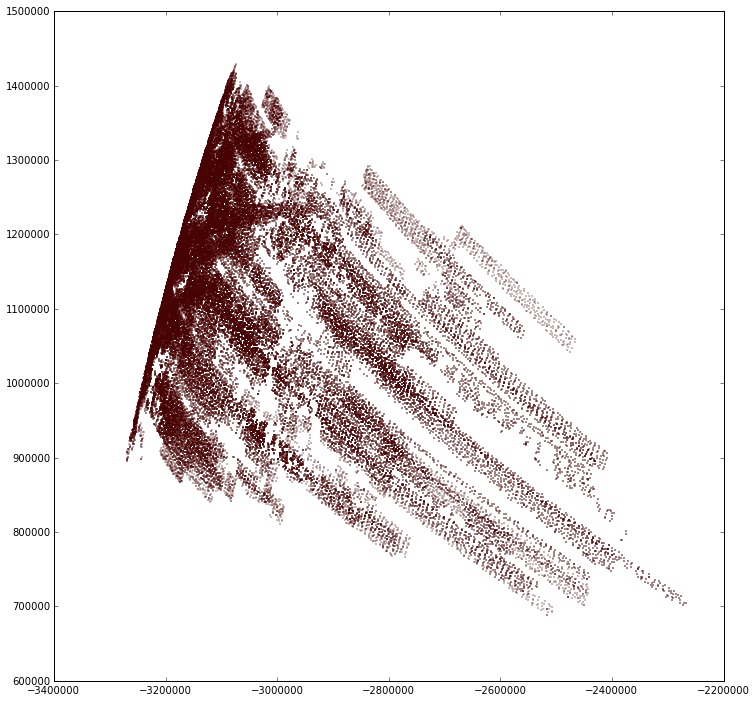

In [8]:
figsize(12,12)
plot(df['adjustedx'], df['adjustedy'], 'ro', markersize=1, alpha=0.5)

###Adding a column to the dataframe
A dataframe is akin to an R style dataframe.  Here we will add a residuals (magnitude of the residuals) column, computed as $residual = \sqrt{x_{residual}^{2} + y_{residual}^{2} }$

In [9]:
df['residual'] = pd.Series(np.sqrt(df['lineresidual'] ** 2 + df['sampleresidual'] ** 2), index=df.index)

/Users/jay/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


###Now sort the dataframe based on the magnitude of the residual.

In [10]:
df.sort('residual', ascending=False)[:10]

,pointid,apriorix,aprioriy,aprioriz,adjustedx,adjustedy,adjustedz,lineresidual,sampleresidual,serialnumber,residual
841526,ELYDIR_LW_56,-2534120.909081,818309.458763,2090532.706661,-2534078.624182,818270.411493,2090599.989146,0.674118,0.789523,Odyssey/THEMIS_IR/896070290.051,1.038163
827706,I28500006RDR_grid_197_ELYS,-3023205.284967,940061.639069,1215009.870089,-3023203.910161,940082.039397,1214997.502923,0.900895,0.364081,Odyssey/THEMIS_IR/720291021.051,0.971682
676140,I22535014RDR_grid_369_ELYS,-3023615.994564,939269.209159,1214588.709279,-3023614.851023,939289.698560,1214575.660591,0.859900,0.379133,Odyssey/THEMIS_IR/720291021.051,0.939771
155314,I03889002RDR_grid_78_ELYS,-3051878.488256,1024105.069034,1068479.129387,-3051891.529804,1024117.820218,1068429.117352,0.834127,0.280236,Odyssey/THEMIS_IR/720468991.102,0.879943
52166,I01692013RDR_bndry_13_ELYS,-3051424.620093,1023477.917414,1070137.824088,-3051437.689596,1023490.849874,1070087.652988,0.832341,0.278700,Odyssey/THEMIS_IR/720468991.102,0.877761
412288,I13874012RDR_grid_208_ELYS,-3211289.097091,959781.878691,522771.992961,-3211304.960399,959851.640450,522546.741442,-0.860009,0.075895,Odyssey/THEMIS_IR/701735240.076,0.863351
587580,I18030012RDR_grid_307_ELYS,-3030825.105898,1334671.875795,736239.433745,-3030832.772343,1334724.824979,736111.861570,0.828446,0.063808,Odyssey/THEMIS_IR/890122951.128,0.830900
149537,I03527002RDR_grid_115_ELYS,-2562356.999752,738886.184824,2088662.307949,-2562470.919931,738857.026068,2088533.235147,0.568340,0.599262,Odyssey/THEMIS_IR/749855575.051,0.825909
58275,I01742007RDR_grid_272_ELYS,-3103866.486157,1256925.237397,543810.310534,-3103877.453549,1256962.637360,543659.565726,0.382994,0.720006,Odyssey/THEMIS_IR/885683645.204,0.815532
489663,I17256016RDR_grid_376_ELYS,-3206834.092238,971599.338154,528015.960429,-3206823.485041,971639.920640,528005.781667,0.804253,0.122061,Odyssey/THEMIS_IR/719935749.128,0.813463


It would be awesome to be able to visualize all of the residuals in the upper quartile.

In [11]:
df['residual'].describe()

count    131750.000000
mean          0.179381
std           0.129137
min           0.000285
25%           0.088529
50%           0.147333
75%           0.233835
max           1.038163
Name: residual, dtype: float64

In [12]:
import time
t1 = time.time()
high_res = df[df['residual'] >= 0.233835]
t2 = time.time()
print t2 - t1
print len(high_res)

0.0227921009064
32938


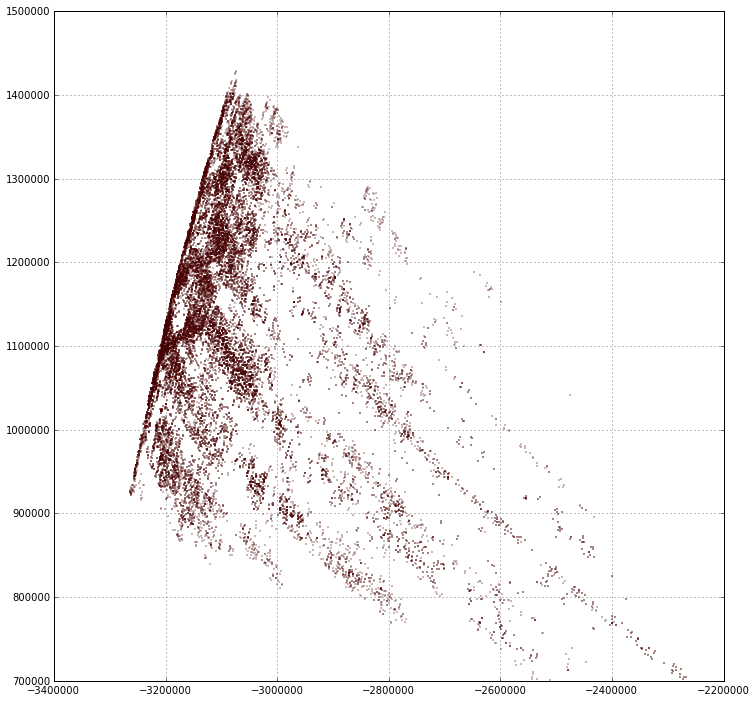

In [13]:
#Check to see if we have any spatial pattern to the high residual data
plot(high_res['adjustedx'], high_res['adjustedy'], 'ro', markersize=1, alpha=0.5)
grid()

###Groupby Operations
Here we are going to ask two questions:

1. What is the maximum residual, grouped by point
2. What is the maximum residual, grouped by image

Since pandas dataframes are essentially in memory databases, groupby operations are exceptionally fast.

In [14]:
#Maximum residual by point
#First grab a list of the unique point ids
pids = df['pointid'].unique()

#Then groupby the pointid.  We also subset the data for only 3 columns
grp = df[['pointid', 'residual', 'serialnumber']].groupby('pointid')

#Then aggregate by the max of the residuals and sort descending.
agg_df = grp.aggregate([np.max, np.mean, np.std])
agg_df.sort([('residual', 'amax')], ascending=False)

residual                        
                                 amax      mean           std
pointid                                                      
ELYDIR_LW_56                 1.038163  0.694215  2.978688e-01
I28500006RDR_grid_197_ELYS   0.971682  0.432217  3.310406e-01
I22535014RDR_grid_369_ELYS   0.939771  0.409619  3.192213e-01
I03889002RDR_grid_78_ELYS    0.879943  0.587087  2.629153e-01
I01692013RDR_bndry_13_ELYS   0.877761  0.585662  2.621988e-01
I13874012RDR_grid_208_ELYS   0.863351  0.587688  2.569100e-01
I18030012RDR_grid_307_ELYS   0.830900  0.611832  3.098088e-01
I03527002RDR_grid_115_ELYS   0.825909  0.560951  2.307314e-01
I01742007RDR_grid_272_ELYS   0.815532  0.395526  3.383238e-01
I17256016RDR_grid_376_ELYS   0.813463  0.541663  2.613150e-01
I17069048RDR_bndry_4_ELYS    0.813032  0.810789  3.171585e-03
I14336013RDR_bndry_50_ELYS   0.812594  0.588777  3.165247e-01
I01380005RDR_bndry_98_ELYS   0.809013  0.384772  3.858083e-01
I17880013RDR_bndry_74_ELYS   0.808142  0.414140  2.869577e-01
I03814010RDR_grid_134_ELYS   0.806234  0.536856  2.582501e-01
I26179014RDR_bndry_101_ELYS  0.805883  0.351793  3.161592e-01
I16445013RDR_bndry_20_ELYS   0.805702  0.450199  3.184028e-01
I07634047RDR_grid_410_ELYS   0.801826  0.478137  2.465124e-01
I14311020RDR_grid_158_ELYS   0.801002  0.356308  2.849840e-01
I17331018RDR_bndry_12_ELYS   0.799687  0.460712  2.300120e-01
I17019008RDR_grid_564_ELYS   0.799670  0.794822  6.857012e-03
I16445013RDR_bndry_65_ELYS   0.799309  0.328948  2.748779e-01
I17980006RDR_bndry_14_ELYS   0.799021  0.533136  2.285082e-01
I16445013RDR_grid_116_ELYS   0.798987  0.278354  2.601208e-01
I00918005RDR_bndry_30_ELYS   0.798956  0.359544  3.081638e-01
I05075015RDR_grid_388_ELYS   0.798765  0.455497  2.738927e-01
I02054002RDR_grid_381_ELYS   0.798454  0.423674  2.699695e-01
I07734019RDR_grid_508_ELYS   0.798223  0.738349  1.018994e-01
I21312007RDR_bndry_42_ELYS   0.798166  0.481717  2.498319e-01
I13874012RDR_bndry_92_ELYS   0.797765  0.546877  2.175226e-01
...                               ...       ...           ...
I11603006RDR_bndry_134_ELYS  0.006430  0.006406  3.277948e-05
I11341012RDR_grid_135_ELYS   0.006163  0.006163           NaN
I10979009RDR_bndry_6_ELYS    0.006116  0.006077  5.532438e-05
I18342013RDR_grid_290_ELYS   0.005959  0.005951  1.168161e-05
I19590007RDR_bndry_86_ELYS   0.005930  0.005921  1.196069e-05
I17094013RDR_grid_118_ELYS   0.005795  0.005795           NaN
I09731013RDR_grid_331_ELYS   0.005491  0.005488  4.271502e-06
I13762010RDR_bndry_3_ELYS    0.005288  0.005288           NaN
I17980006RDR_grid_370_ELYS   0.005233  0.005213  2.826787e-05
I13762010RDR_bndry_2_ELYS    0.004661  0.004661           NaN
I21699003RDR_grid_257_ELYS   0.004561  0.004547  1.979842e-05
I18342013RDR_grid_166_ELYS   0.004560  0.004537  3.245329e-05
I10567024RDR_grid_270_ELYS   0.004476  0.004476           NaN
I19016010RDR_bndry_10_ELYS   0.004297  0.004297           NaN
I11603006RDR_grid_328_ELYS   0.004201  0.004195  8.603052e-06
I11341012RDR_grid_201_ELYS   0.004154  0.004154           NaN
I09731013RDR_grid_355_ELYS   0.003910  0.003908  3.687073e-06
I17406010RDR_grid_533_ELYS   0.003892  0.003889  3.944946e-06
I17281011RDR_grid_524_ELYS   0.003834  0.003833  1.112416e-06
I28575002RDR_grid_415_ELYS   0.003184  0.003174  1.472965e-05
I19253013RDR_grid_305_ELYS   0.002677  0.002663  1.961195e-05
I09731013RDR_bndry_112_ELYS  0.002660  0.002656  5.171720e-06
I11840005RDR_grid_230_ELYS   0.002431  0.002419  1.644990e-05
I09706013RDR_grid_230_ELYS   0.001984  0.001972  1.709647e-05
I10230015RDR_grid_565_ELYS   0.001782  0.001781  1.140489e-06
I18342013RDR_bndry_48_ELYS   0.001742  0.001734  1.112274e-05
I08533017RDR_grid_316_ELYS   0.001426  0.001426           NaN
I04301002RDR_grid_334_ELYS   0.001322  0.001322  2.132780e-07
I11341012RDR_grid_195_ELYS   0.001181  0.001181           NaN
I10642013RDR_bndry_48_ELYS   0.001103  0.001103           NaN

[46208 rows x 3 columns]

In [15]:
#Get a specific group to see what is going on
grp.get_group('ELYDIR_LW_56')

,pointid,residual,serialnumber
841526,ELYDIR_LW_56,1.038163,Odyssey/THEMIS_IR/896070290.051
841527,ELYDIR_LW_56,0.521392,Odyssey/THEMIS_IR/777021248.153
841528,ELYDIR_LW_56,0.523090,Odyssey/THEMIS_IR/847154410.000


####By image
This is largely identical, we just swap the pointid group for the serialnumber group

In [16]:
#Maximum residual by image

#Then groupby the pointid.  We also subset the data for only 3 columns
img_grp = df[['serialnumber', 'residual', 'pointid']].groupby('serialnumber')

#Then aggregate by the max of the residuals and sort descending.
agg_df_img = img_grp.aggregate([np.max, np.mean, np.std])
agg_df_img_sorted = agg_df_img.sort([('residual', 'amax')], ascending=False)
agg_df_img_sorted

residual                    
                                     amax      mean       std
serialnumber                                                 
Odyssey/THEMIS_IR/896070290.051  1.038163  0.151302  0.106162
Odyssey/THEMIS_IR/720291021.051  0.971682  0.182484  0.120797
Odyssey/THEMIS_IR/720468991.102  0.879943  0.151280  0.139297
Odyssey/THEMIS_IR/701735240.076  0.863351  0.176638  0.122937
Odyssey/THEMIS_IR/890122951.128  0.830900  0.183095  0.128422
Odyssey/THEMIS_IR/749855575.051  0.825909  0.326525  0.186803
Odyssey/THEMIS_IR/885683645.204  0.815532  0.237796  0.160563
Odyssey/THEMIS_IR/719935749.128  0.813463  0.247264  0.168750
Odyssey/THEMIS_IR/700227355.230  0.813032  0.184675  0.118871
Odyssey/THEMIS_IR/898112554.128  0.808547  0.173817  0.121135
Odyssey/THEMIS_IR/712923040.204  0.805702  0.232856  0.162391
Odyssey/THEMIS_IR/809780092.204  0.802665  0.293110  0.175320
Odyssey/THEMIS_IR/851060510.153  0.801826  0.362992  0.189128
Odyssey/THEMIS_IR/774979855.179  0.801002  0.170431  0.131184
Odyssey/THEMIS_IR/813862975.230  0.799687  0.208704  0.148825
Odyssey/THEMIS_IR/702624310.153  0.799021  0.188094  0.135158
Odyssey/THEMIS_IR/699338330.000  0.798956  0.218926  0.127762
Odyssey/THEMIS_IR/809602287.128  0.798765  0.276012  0.176991
Odyssey/THEMIS_IR/816082680.025  0.798454  0.221841  0.144590
Odyssey/THEMIS_IR/814396816.153  0.798223  0.211592  0.130671
Odyssey/THEMIS_IR/897756977.025  0.797201  0.322286  0.205943
Odyssey/THEMIS_IR/807916268.076  0.796853  0.276322  0.181082
Odyssey/THEMIS_IR/723399050.153  0.796465  0.257867  0.165454
Odyssey/THEMIS_IR/829754947.204  0.796132  0.205691  0.154708
Odyssey/THEMIS_IR/728903599.128  0.796069  0.215671  0.144236
Odyssey/THEMIS_IR/853101795.179  0.795769  0.256460  0.165884
Odyssey/THEMIS_IR/702802260.128  0.795405  0.167202  0.123329
Odyssey/THEMIS_IR/747281773.000  0.794877  0.167669  0.118893
Odyssey/THEMIS_IR/809068871.051  0.793370  0.260948  0.165795
Odyssey/THEMIS_IR/749678240.025  0.793209  0.211799  0.142267
...                                   ...       ...       ...
Odyssey/THEMIS_IR/731478292.076  0.533835  0.143520  0.097491
Odyssey/THEMIS_IR/883108285.179  0.533738  0.128907  0.088799
Odyssey/THEMIS_IR/724287866.025  0.532346  0.135148  0.092370
Odyssey/THEMIS_IR/710525931.128  0.528988  0.138092  0.093650
Odyssey/THEMIS_IR/899976492.204  0.528979  0.139851  0.082910
Odyssey/THEMIS_IR/777021248.153  0.521392  0.137445  0.073904
Odyssey/THEMIS_IR/881955770.204  0.517135  0.122188  0.081798
Odyssey/THEMIS_IR/866063772.025  0.502359  0.146572  0.085290
Odyssey/THEMIS_IR/705021249.102  0.499165  0.140244  0.100328
Odyssey/THEMIS_IR/830907673.051  0.498224  0.136025  0.101094
Odyssey/THEMIS_IR/707951425.051  0.496821  0.122421  0.074028
Odyssey/THEMIS_IR/831262983.102  0.494090  0.183623  0.113762
Odyssey/THEMIS_IR/867749706.230  0.492216  0.156592  0.092910
Odyssey/THEMIS_IR/861269154.204  0.486155  0.176163  0.112969
Odyssey/THEMIS_IR/878669301.051  0.481516  0.125667  0.067699
Odyssey/THEMIS_IR/775335190.076  0.478254  0.111526  0.066131
Odyssey/THEMIS_IR/770363111.204  0.468701  0.132195  0.080438
Odyssey/THEMIS_IR/824960067.076  0.465702  0.120121  0.070606
Odyssey/THEMIS_IR/818479942.153  0.446744  0.132606  0.082634
Odyssey/THEMIS_IR/866597303.204  0.440846  0.182437  0.095926
Odyssey/THEMIS_IR/843249150.025  0.430229  0.112116  0.076710
Odyssey/THEMIS_IR/818480240.153  0.424648  0.137255  0.083853
Odyssey/THEMIS_IR/773471573.102  0.423616  0.075222  0.066625
Odyssey/THEMIS_IR/706529395.230  0.420580  0.138381  0.077283
Odyssey/THEMIS_IR/783679884.076  0.404077  0.144462  0.075524
Odyssey/THEMIS_IR/823274143.025  0.400010  0.094876  0.064625
Odyssey/THEMIS_IR/832151835.025  0.395760  0.096850  0.059700
Odyssey/THEMIS_IR/867571867.051  0.393261  0.152192  0.079866
Odyssey/THEMIS_IR/777732514.025  0.302567  0.103499  0.052427
Odyssey/THEMIS_IR/823452127.230  0.252780  0.088892  0.053714

[187 rows x 3 columns]

A quick visual check of the above looks like a few images contain multiple high residual points.  Lets get some counts on the upper quantile.

In [17]:
agg_df_img_sorted.describe()

residual                        
             amax        mean         std
count  187.000000  187.000000  187.000000
mean     0.690366    0.181271    0.118707
std      0.128129    0.048852    0.030165
min      0.252780    0.075222    0.052427
25%      0.607203    0.145555    0.097445
50%      0.743913    0.177958    0.116128
75%      0.785456    0.207296    0.135599
max      1.038163    0.362992    0.205943

In [18]:
mask = agg_df_img_sorted['residual', 'amax'] > 0.785456
mask_df = agg_df_img_sorted[mask]
mask_df

residual                    
                                     amax      mean       std
serialnumber                                                 
Odyssey/THEMIS_IR/896070290.051  1.038163  0.151302  0.106162
Odyssey/THEMIS_IR/720291021.051  0.971682  0.182484  0.120797
Odyssey/THEMIS_IR/720468991.102  0.879943  0.151280  0.139297
Odyssey/THEMIS_IR/701735240.076  0.863351  0.176638  0.122937
Odyssey/THEMIS_IR/890122951.128  0.830900  0.183095  0.128422
Odyssey/THEMIS_IR/749855575.051  0.825909  0.326525  0.186803
Odyssey/THEMIS_IR/885683645.204  0.815532  0.237796  0.160563
Odyssey/THEMIS_IR/719935749.128  0.813463  0.247264  0.168750
Odyssey/THEMIS_IR/700227355.230  0.813032  0.184675  0.118871
Odyssey/THEMIS_IR/898112554.128  0.808547  0.173817  0.121135
Odyssey/THEMIS_IR/712923040.204  0.805702  0.232856  0.162391
Odyssey/THEMIS_IR/809780092.204  0.802665  0.293110  0.175320
Odyssey/THEMIS_IR/851060510.153  0.801826  0.362992  0.189128
Odyssey/THEMIS_IR/774979855.179  0.801002  0.170431  0.131184
Odyssey/THEMIS_IR/813862975.230  0.799687  0.208704  0.148825
Odyssey/THEMIS_IR/702624310.153  0.799021  0.188094  0.135158
Odyssey/THEMIS_IR/699338330.000  0.798956  0.218926  0.127762
Odyssey/THEMIS_IR/809602287.128  0.798765  0.276012  0.176991
Odyssey/THEMIS_IR/816082680.025  0.798454  0.221841  0.144590
Odyssey/THEMIS_IR/814396816.153  0.798223  0.211592  0.130671
Odyssey/THEMIS_IR/897756977.025  0.797201  0.322286  0.205943
Odyssey/THEMIS_IR/807916268.076  0.796853  0.276322  0.181082
Odyssey/THEMIS_IR/723399050.153  0.796465  0.257867  0.165454
Odyssey/THEMIS_IR/829754947.204  0.796132  0.205691  0.154708
Odyssey/THEMIS_IR/728903599.128  0.796069  0.215671  0.144236
Odyssey/THEMIS_IR/853101795.179  0.795769  0.256460  0.165884
Odyssey/THEMIS_IR/702802260.128  0.795405  0.167202  0.123329
Odyssey/THEMIS_IR/747281773.000  0.794877  0.167669  0.118893
Odyssey/THEMIS_IR/809068871.051  0.793370  0.260948  0.165795
Odyssey/THEMIS_IR/749678240.025  0.793209  0.211799  0.142267
Odyssey/THEMIS_IR/731478444.179  0.792969  0.228185  0.133581
Odyssey/THEMIS_IR/724110313.076  0.792791  0.275533  0.180782
Odyssey/THEMIS_IR/885506188.076  0.792565  0.194691  0.133274
Odyssey/THEMIS_IR/704665597.076  0.791541  0.200354  0.131353
Odyssey/THEMIS_IR/717894088.051  0.791488  0.150142  0.113873
Odyssey/THEMIS_IR/861091310.128  0.791219  0.273234  0.160421
Odyssey/THEMIS_IR/895537107.076  0.790734  0.259390  0.188456
Odyssey/THEMIS_IR/863844323.230  0.790686  0.212174  0.135964
Odyssey/THEMIS_IR/704843436.025  0.789973  0.188078  0.135319
Odyssey/THEMIS_IR/895359267.076  0.789604  0.268904  0.169609
Odyssey/THEMIS_IR/746926180.076  0.788230  0.177458  0.134456
Odyssey/THEMIS_IR/818657798.128  0.786845  0.167118  0.110642
Odyssey/THEMIS_IR/816260423.000  0.786520  0.233630  0.160117
Odyssey/THEMIS_IR/798149405.230  0.786450  0.222475  0.139399
Odyssey/THEMIS_IR/761485474.153  0.786341  0.145990  0.108109
Odyssey/THEMIS_IR/818301890.153  0.786008  0.170732  0.126269
Odyssey/THEMIS_IR/778885375.179  0.785512  0.146290  0.099299

###Connectivity
Finally, we are going to visualize the connectivity of the network.

In [20]:
import itertools
import networkx as nx  #should be included with the installer, if not `!conda install networkx`

In [21]:
#Create a graph
g = nx.Graph()

In [22]:
g.add_nodes_from(df['serialnumber'].unique())

In [23]:
grp = df.groupby('pointid')
edges = set([])
for i, grp in grp:
    edge_candidates = grp['serialnumber'].unique()
    for e in list(itertools.combinations(edge_candidates, 2)):
        edges.add(e)

g.add_edges_from(edges)

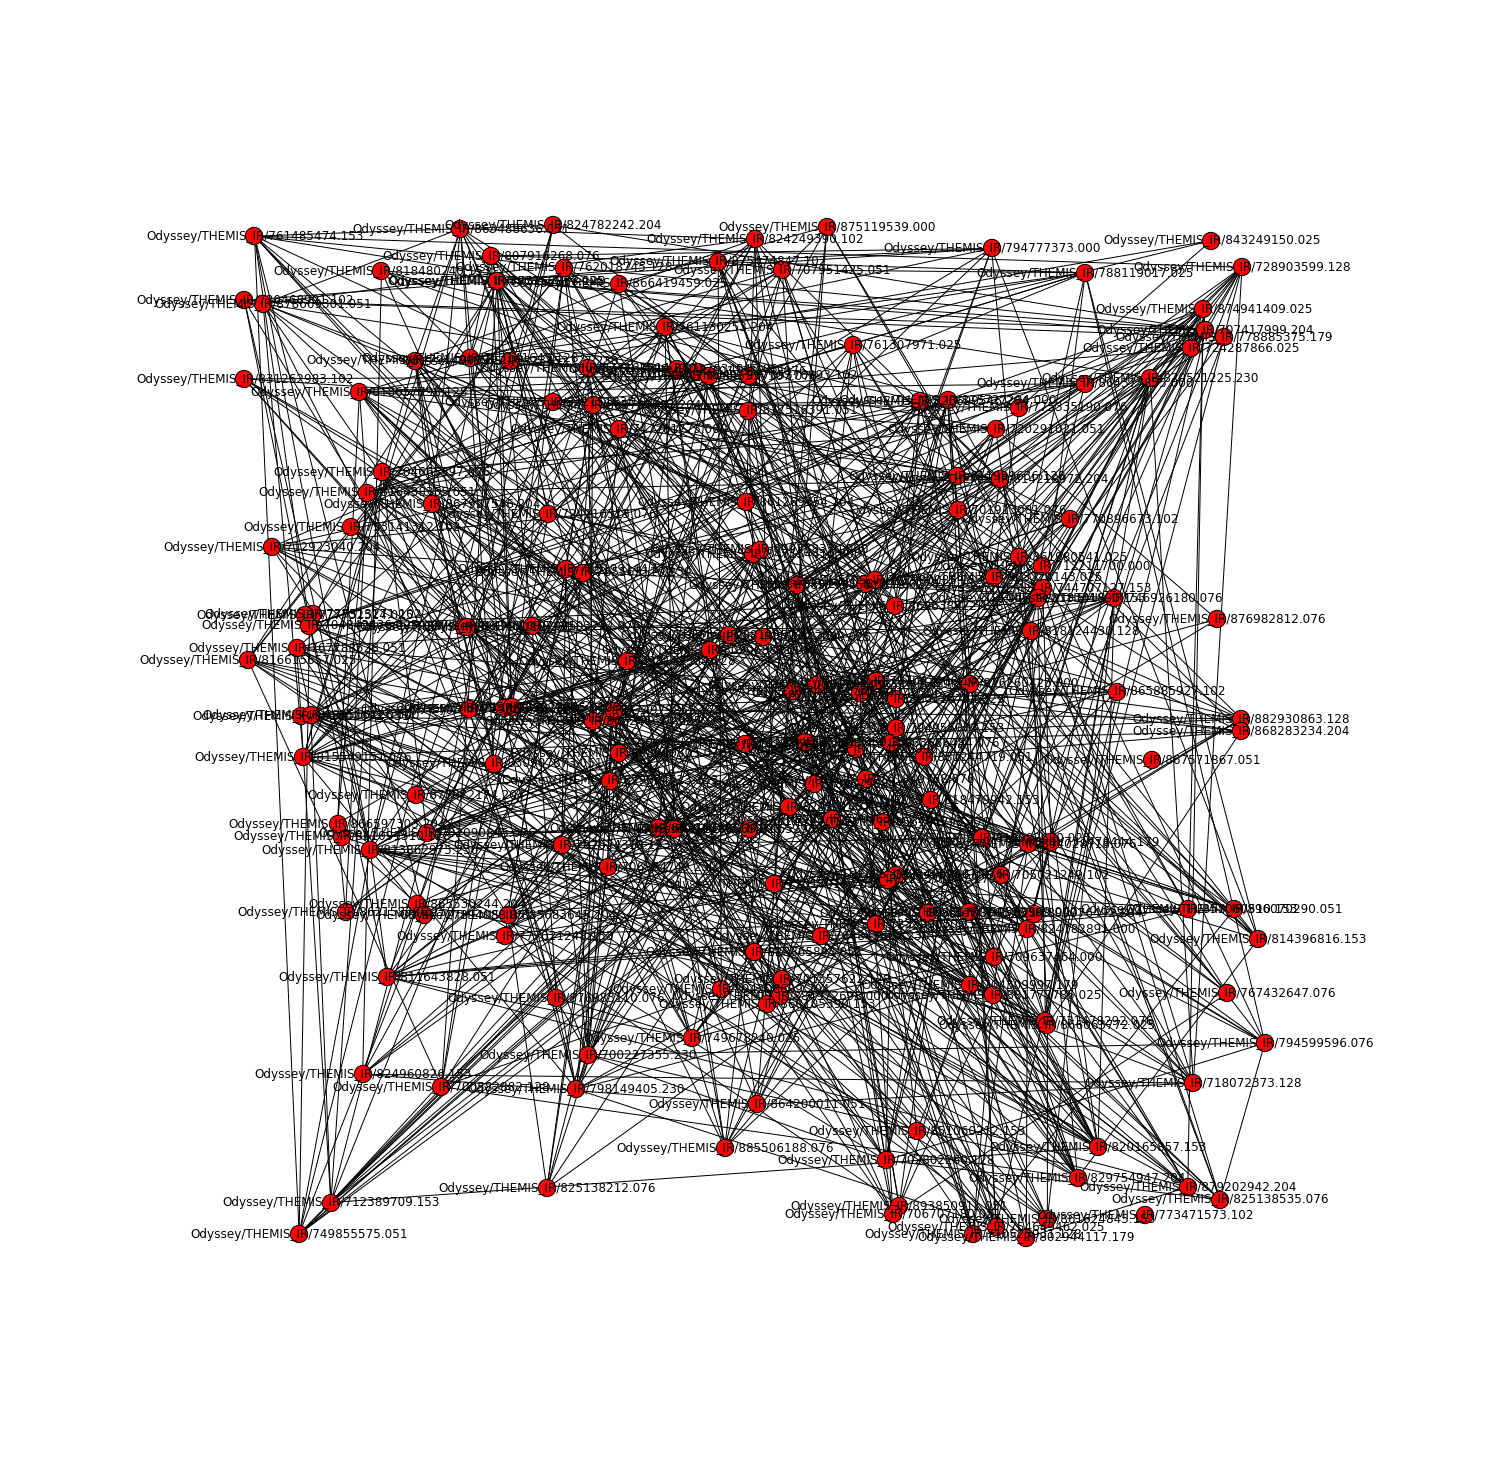

In [28]:
figsize(20,20)
nx.draw_random(g)

Definitely nice to see a visualization, but unforunately, the distirbution of the nodes leaves a little to be desired.  We see that NetworkX is the right tool to generate the network, but probably not ideal for visualization.  Lets export the graph to JSON and see what we can do.

Lets try this using the force directed graph example that ships with NetoworkX, but uses D3 (a javascript library).

In [38]:
import json
from networkx.readwrite import json_graph

#Tag the nodes with a node name
for n in g:
    g.node[n]['name'] = n

d = json_graph.node_link_data(g) # node-link format to serialize
# write json
json.dump(d, open('data/force/force.json','w'))

In [39]:
!cat data/force/force.json

{"directed": false, "graph": [], "nodes": [{"name": "Odyssey/THEMIS_IR/719935749.128", "id": "Odyssey/THEMIS_IR/719935749.128"}, {"name": "Odyssey/THEMIS_IR/778885375.179", "id": "Odyssey/THEMIS_IR/778885375.179"}, {"name": "Odyssey/THEMIS_IR/707951425.051", "id": "Odyssey/THEMIS_IR/707951425.051"}, {"name": "Odyssey/THEMIS_IR/863666484.076", "id": "Odyssey/THEMIS_IR/863666484.076"}, {"name": "Odyssey/THEMIS_IR/702446644.000", "id": "Odyssey/THEMIS_IR/702446644.000"}, {"name": "Odyssey/THEMIS_IR/877161214.230", "id": "Odyssey/THEMIS_IR/877161214.230"}, {"name": "Odyssey/THEMIS_IR/884972698.000", "id": "Odyssey/THEMIS_IR/884972698.000"}, {"name": "Odyssey/THEMIS_IR/879025059.230", "id": "Odyssey/THEMIS_IR/879025059.230"}, {"name": "Odyssey/THEMIS_IR/705021249.102", "id": "Odyssey/THEMIS_IR/705021249.102"}, {"name": "Odyssey/THEMIS_IR/807916268.076", "id": "Odyssey/THEMIS_IR/807916268.076"}, {"name": "Odyssey/THEMIS_IR/811466069.025", "id": "Odyssey/THEMIS_IR/811466069.025"}, {"name": "O

In [42]:
import IPython.lib.display as display
display.IFrame('data/force/force.html',
              width=1000,
              height=800)